In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path
import numpy as np
import scipy.misc

In [2]:
import tensorflow as tf

In [3]:
# Image Plot helper function
def plot_img(img, transformed_img, method_name, gray=False, original_gray=False):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 9))
    #f.tight_layout()
    if original_gray:
        ax1.imshow(img,cmap='gray')
    else:
        ax1.imshow(img)
    ax1.set_title('Original Image')
    if gray:
        ax2.imshow(transformed_img, cmap='gray')
    else:
        ax2.imshow(transformed_img)
    ax2.set_title(method_name)
    #plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [5]:
image_shape = (160, 576)

In [6]:
img = scipy.misc.imread(os.path.join('data','test','0.png')) #315.png,783.png
img2 = scipy.misc.imresize(img,image_shape)

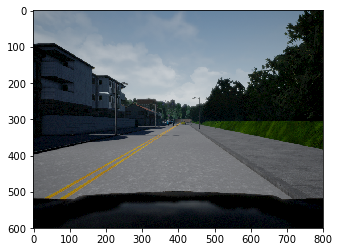

In [7]:
plt.imshow(img)

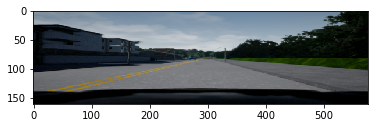

In [8]:
plt.imshow(img2)

In [10]:
# Load the model and variable, placeholders
sess = tf.Session()
saver = tf.train.import_meta_graph('data/model1/model1.meta')
saver.restore(sess,tf.train.latest_checkpoint('data/model1'))
graph = tf.get_default_graph()
labels = graph.get_tensor_by_name("labels:0")
logits_2d = graph.get_tensor_by_name("logits_2d:0")
labels_2d = graph.get_tensor_by_name("labels_2d:0")
loss = graph.get_tensor_by_name("loss:0")
image_input = graph.get_tensor_by_name("image_input:0")
keep_prob = graph.get_tensor_by_name("keep_prob:0")
lr = graph.get_tensor_by_name("learning_rate:0")    

INFO:tensorflow:Restoring parameters from data/model1/model1


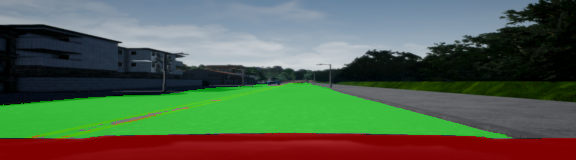

In [13]:
# logits applied softmax result
im_softmax = sess.run([tf.nn.softmax(logits_2d)],{keep_prob: 1.0, image_input: [img2]})
im_softmax_car  = im_softmax[0][:, 0].reshape(image_shape[0], image_shape[1])
im_softmax_road = im_softmax[0][:, 1].reshape(image_shape[0], image_shape[1])
segmentation_car  = (im_softmax_car > 0.5).reshape(image_shape[0], image_shape[1], 1)
segmentation_road = (im_softmax_road > 0.5).reshape(image_shape[0], image_shape[1], 1)
mask_car = np.dot(segmentation_car, np.array([[255, 0, 0, 127]]))
mask_car = scipy.misc.toimage(mask_car, mode="RGBA")
mask_road = np.dot(segmentation_road, np.array([[0, 255, 0, 127]]))
mask_road = scipy.misc.toimage(mask_road, mode="RGBA")
street_im = scipy.misc.toimage(img2)
street_im.paste(mask_car, box=None, mask=mask_car)
street_im.paste(mask_road, box=None, mask=mask_road)
street_im